100%|██████████| 10079/10079 [00:00<00:00, 70957.21it/s]


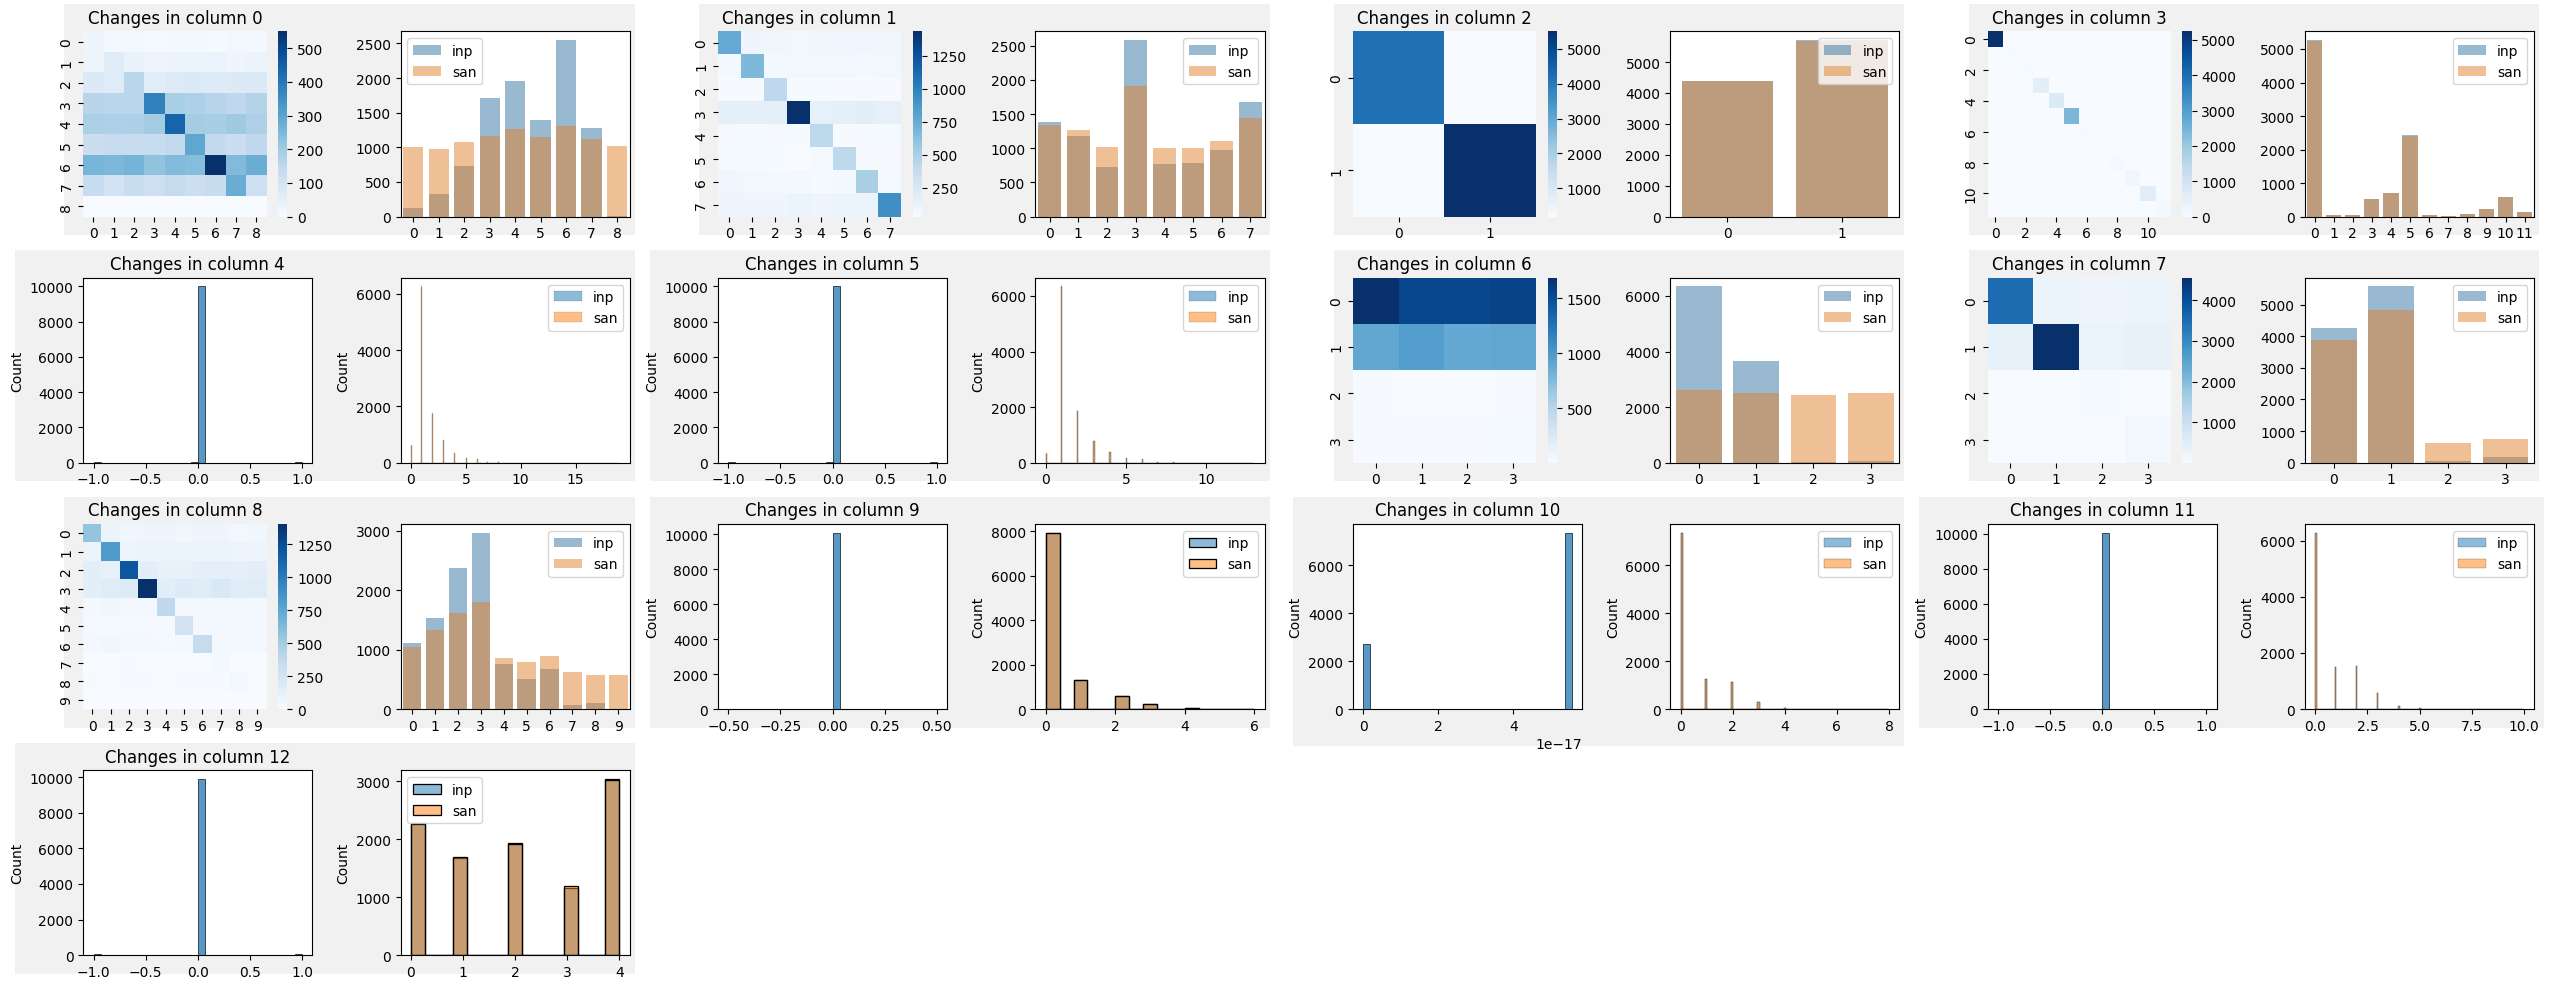

In [1]:
import src_v1 as src
from importlib import reload

reload(src)
from src_v1.embedding import Embedding
from src_v1.neighborhoods import CachedNeighborhoods, Ellipsoid, NeighborhoodStats

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from typing import List
from tqdm import tqdm

inpData = np.load("test_data.npy")  # [:300]

embedding = Embedding.Mixed(
    Embedding.Categorical(inpData[:, 0], scale=0.1, n_cat=9),
    Embedding.Categorical(inpData[:, 1], scale=0.3, n_cat=8),
    Embedding.Categorical(inpData[:, 2], scale=0.5, n_cat=2),
    Embedding.Categorical(inpData[:, 3], scale=1.0, n_cat=12),
    Embedding.Discrete(inpData[:, 4]),
    Embedding.Discrete(inpData[:, 5]),
    Embedding.Categorical(inpData[:, 6], scale=0.01, n_cat=4),
    Embedding.Categorical(inpData[:, 7], scale=0.4, n_cat=4),
    Embedding.Categorical(inpData[:, 8], scale=0.3, n_cat=10),
    Embedding.Discrete(inpData[:, 9]),
    Embedding.Discrete(inpData[:, [10, 11]]),
    Embedding.Discrete(inpData[:, 12]),
)

embData = embedding.embed(inpData)
# Simple isotropic sanitization:
noise_p_norm = 1
noise_scale = 1

rand_rad = lambda size=None: np.random.gamma(embedding.d, size=size) / embedding.d
_with_norm_1 = lambda X: X / np.linalg.norm(X, axis=-1, keepdims=True)
rand_direction = lambda : _with_norm_1(np.random.normal(size=embedding.d))

embSanData = []
with tqdm(range(len(inpData))) as pbar:
    for i in pbar:
        x = embData[i]
        R = rand_rad() * noise_scale
        direction = rand_direction()
        san_x = x + R * direction
        embSanData.append(san_x)
embSanData = np.array(embSanData)
sanData = embedding.unembed(embSanData)

# np.save(f"test_data_out_{len(sanData)}.npy", sanData)
src.plots.plot_changes(inpData, sanData, embedding)

In [35]:
# sns.set_style("whitegrid")

# df = pd.DataFrame(sanData, columns=[{0:'age', 2:'gender', 3:'visits'}.get(i,i) for i in  range(sanData.shape[1])])
# df.groupby(by='age')['age'].count().plot.bar()
# plt.show()

# df.loc[df['gender']==0, 'age'].plot.hist()
# plt.show()